In [1]:
import pandas as pd
houses = pd.read_table('AmesHousing.txt')

In [2]:
def mean(distribution):
    sum_distribution = 0
    for value in distribution:
        sum_distribution +=value
    return sum_distribution / len(distribution)
function_mean = mean(houses['SalePrice'])
pandas_mean = houses['SalePrice'].mean()
means_are_equal = (function_mean == pandas_mean)

Text(0,0.5,u'Sampling error')

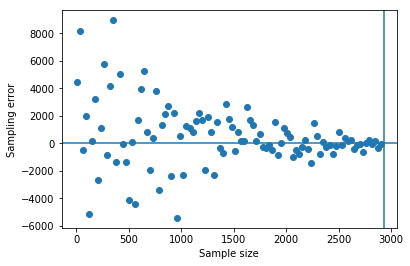

In [4]:
parameter = houses['SalePrice'].mean()
sample_size = 5

sample_sizes = []
sampling_errors = []

for i in range(101):
    sample = houses['SalePrice'].sample(sample_size,random_state=i)
    statistic = sample.mean()
    sampling_error = parameter - statistic
    sampling_errors.append(sampling_error)
    sample_sizes.append(sample_size)
    sample_size +=29
    
import matplotlib.pyplot as plt

plt.scatter(sample_sizes,sampling_errors)
plt.axhline(0)
plt.axvline(2930)
plt.xlabel('Sample size')
plt.ylabel('Sampling error')

(0, 500000)

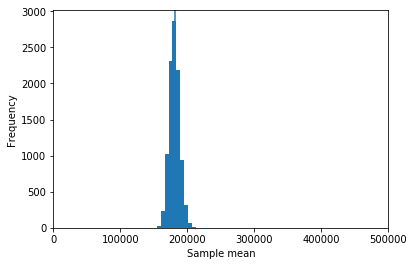

In [5]:
means=[]

for i in range(10000):
    sample = houses['SalePrice'].sample(100,random_state=i)
    means.append(sample.mean())
plt.hist(means)
plt.axvline(houses['SalePrice'].mean())
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.xlim(0,500000)

In [6]:
population = [3,7,2]
samples = [[3,7],[3,2],[7,2],[7,3],[2,3],[2,7]]

sample_means = []
for sample in samples:
    sample_means.append(sum(sample) / len(sample))
population_mean = sum(population) / len(population)
mean_of_sample_means = sum(sample_means) / len(sample_means)
unbiased = (population_mean == mean_of_sample_means)

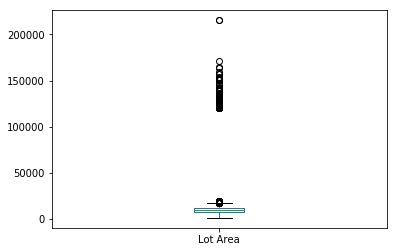

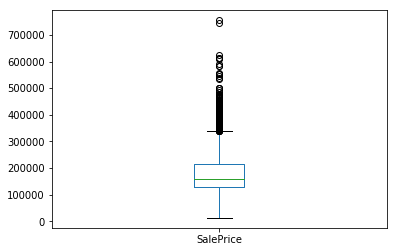

3680.70511945
20796.0600683


In [7]:
import matplotlib.pyplot as plt

houses['Lot Area'].plot.box()
plt.show()
houses['SalePrice'].plot.box()
plt.show()

lotarea_difference = houses['Lot Area'].mean() - houses['Lot Area'].median()
saleprice_difference = houses['SalePrice'].mean() - houses['SalePrice'].median()

print(lotarea_difference)
print(saleprice_difference)


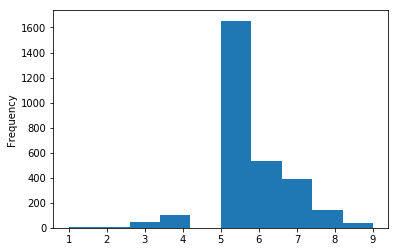

In [8]:
ean= houses['Overall Cond'].mean()
median = houses['Overall Cond'].median()

houses['Overall Cond'].plot.hist()

In [9]:
def mode(array):
    counts = {}
    for value in array:
        if value in counts:
            counts[value] +=1
        else:
            counts[value] =1
    return max(counts,key = counts.get)
mode_function = mode(houses['Land Slope'])
mode_method = houses['Land Slope'].mode()

same = (mode_function == mode_method)

In [10]:
intervals = pd.interval_range(start = 0, end = 800000, freq = 100000)
gr_freq_table = pd.Series([0,0,0,0,0,0,0,0], index = intervals)

for value in houses['SalePrice']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break

print(gr_freq_table)

(0, 100000]          252
(100000, 200000]    1821
(200000, 300000]     627
(300000, 400000]     166
(400000, 500000]      47
(500000, 600000]      11
(600000, 700000]       4
(700000, 800000]       2
dtype: int64


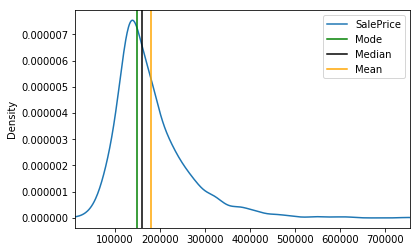

In [11]:
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                     houses['SalePrice'].max()
                                    )
                            )
plt.axvline(150000, color = 'Green', label = 'Mode')
plt.axvline(houses['SalePrice'].median(), color = 'Black', label = 'Median')
plt.axvline(houses['SalePrice'].mean(), color = 'Orange', label = 'Mean')
plt.legend()

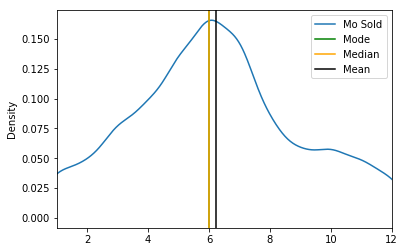

In [12]:
houses['Mo Sold'].plot.kde(xlim = [1,12])

import matplotlib.pyplot as plt
plt.axvline(houses['Mo Sold'].mode()[0], color = 'Green', label = 'Mode')
plt.axvline(houses['Mo Sold'].median(), color = 'Orange', label = 'Median')
plt.axvline(houses['Mo Sold'].mean(), color = 'Black', label = 'Mean')
plt.legend()

In [13]:
def find_range(array):
    return max(array) - min(array)
range_by_year = {}
for year in houses['Yr Sold'].unique():
    data_by_year = houses[houses['Yr Sold'] == year]
    range_by_year[year] = find_range(data_by_year['SalePrice'])
    

In [14]:
C = [1,1,1,1,1,1,1,1,1,21]

def mean_absolute_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        absolute_distance = abs(value-reference_point)
        distances.append(absolute_distance)
    #print(reference_point)
    #print(distances)
    #print(sum(distances))
    #print(len(distances))
    return sum(distances) / len(distances)

mad = mean_absolute_deviation(C)


In [15]:
# Variance 

C = [1,1,1,1,1,1,1,1,1,21]

def variance(array):
    reference_point = sum(array) / len(array)
    distances = []
    
    for value in array:
        squared_distance = (value - reference_point) **2
        distances.append(squared_distance)
    return sum(distances) / len(distances)

variance_C = variance(C)

print(variance_C)

36


In [16]:
# Standard Deviation

from math import sqrt
C = [1,1,1,1,1,1,1,1,1,21]

def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point) **2
        distances.append(squared_distance)
    variance = sum(distances) / len(distances)
    return sqrt(variance)

standard_deviation_C = standard_deviation(C)

print(standard_deviation_C)

6.0


In [17]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

years = {}

for year in houses['Yr Sold'].unique():
    year_segment = houses[houses['Yr Sold'] == year]
    st_dev = standard_deviation(year_segment['SalePrice'])
    years[year] = st_dev
    
greatest_variability = max(years,key=years.get)
lowest_variability = min(years,key=years.get)

print(greatest_variability)
print(lowest_variability)

2006
2010


79873.0586493


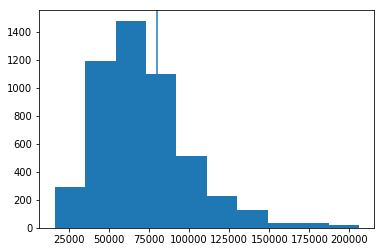

In [18]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

import matplotlib.pyplot as plt

st_devs = []

for i in range(5000):
    sample = houses['SalePrice'].sample(10,random_state=i)
    st_dev = standard_deviation(sample)
    st_devs.append(st_dev)
print(standard_deviation(houses['SalePrice']))
plt.hist(st_devs)
plt.axvline(standard_deviation(houses['SalePrice']))

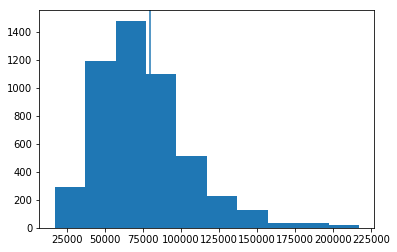

In [19]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

import matplotlib.pyplot as plt
st_devs = []

for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state = i)
    st_dev = standard_deviation(sample)
    st_devs.append(st_dev)
    
#plt.hist(st_devs)
#plt.axvline(standard_deviation(houses['SalePrice']))

def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point) ** 2
        distances.append(squared_distance)
    variance = sum(distances) / (len(distances)-1)
    return sqrt(variance)

import matplotlib.pyplot as plt
st_devs = []

for i in range(5000):
    sample = houses['SalePrice'].sample(10,random_state=i)
    st_dev = standard_deviation(sample)
    st_devs.append(st_dev)
plt.hist(st_devs)
plt.axvline(standard_deviation(houses['SalePrice']))

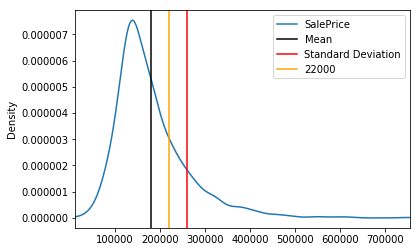

In [33]:
import matplotlib.pyplot as plt
houses['SalePrice'].plot.kde(xlim=(houses['SalePrice'].min(),houses['SalePrice'].max()))
st_dev = houses['SalePrice'].std(ddof=0)
mean = houses['SalePrice'].mean()

plt.axvline(mean,color='Black', label='Mean')
plt.axvline(mean + st_dev,color='Red',label='Standard Deviation')

plt.axvline(220000,color='Orange',label='22000')
plt.legend()


In [34]:
min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()

def z_score(value,array,bessel=0):
    mean = sum(array)/ len(array)
    from numpy import std
    st_dev = std(array,ddof=bessel)
    
    distance = value - mean
    z= distance/st_dev
    return z
min_z = z_score(min_val,houses['SalePrice'])
mean_z = z_score(mean_val,houses['SalePrice'])
max_z = z_score(max_val,houses['SalePrice'])

print(min_z)
print(mean_z)
print(max_z)

-2.1034251452940476
7.52046564985e-07
7.188957198976371


In [35]:
north_ames = houses[houses['Neighborhood'] == 'NAmes']
clg_creek = houses[houses['Neighborhood'] == 'CollgCr']
old_town = houses[houses['Neighborhood'] == 'OldTown']
edwards = houses[houses['Neighborhood'] == 'Edwards']
somerset = houses[houses['Neighborhood'] == 'Somerst']

z_by_location = {}
for data,neighborhood in [(north_ames,'NAmes'),(clg_creek,'CollCr'),(old_town,'OldTown'),(edwards,'Edwards'),(somerset,'Somerst')]:
    z_by_location[neighborhood] = z_score(200000,data['SalePrice'],bessel=0)
print(z_by_location)


{'OldTown': 1.718328240262953, 'Edwards': 1.4435841561015381, 'Somerst': -0.518633405141196, 'NAmes': 1.7239775776419868, 'CollCr': -0.03333563016177404}


In [20]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)
houses['z_prices'] = houses['SalePrice'].apply(
    lambda x: ((x - mean) / st_dev)
    )
z_mean_price = houses['z_prices'].mean()
z_stdev_price = houses['z_prices'].std(ddof=0)

mean_area = houses['Lot Area'].mean()
stdev_area = houses['Lot Area'].std(ddof=0)
houses['z_area'] = houses['Lot Area'].apply(lambda x: ((x-mean_area) / stdev_area))

z_mean_area = houses['z_area'].mean()
z_stdev_area = houses['z_area'].std(ddof=0)

print(z_mean_area)
print(z_stdev_area)

8.77189864166e-18
1.0
